In [1]:
from dqn_utils.models import *
from dqn_utils.utils import define_env, train, optimize_model, action_selection
from dqn_utils.models import manDQN
from adabyron_environment.AdaByronDEMO import AdaByronDEMO
from dqn_utils.memory import Memory
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import random
from collections import deque
import matplotlib.pyplot as plt

In [2]:
def test(network, env, max_steps, generated_energy, action_space):
    inicial_state_consumption, _, _ = env.reset()
    day_step = 0
    initial_state = np.array([inicial_state_consumption, day_step]+generated_energy)
    resultados = [inicial_state_consumption]
    for i in range(0, max_steps):
        tf_tensor = tf.convert_to_tensor(initial_state)
        tf_tensor = tf.expand_dims(initial_state, 0)

        output = network(tf_tensor, training=False)
        action = action_selection(output, action_space)
        next_state, _, done = env.step(action, day_step, generated_energy)
        resultados.append(next_state)
        day_step+=1
        
        next_state = np.array([next_state, day_step]+generated_energy)
        
        initial_state = next_state
        if done:
            print("Done")
            break
    return resultados

In [3]:
def saveFig(pred, results, run_name):
    print("Saving results")
    print("Pred len: {}, res len: {}".format(len(pred), len(results)))
    plt.plot(pred, label='Predicción')
    plt.plot(results, label='Resultados')
    plt.legend()
    plt.savefig('images/results2.png')

Loading models...
Done
Saving results
Pred len: 96, res len: 97


FileNotFoundError: [Errno 2] No such file or directory: 'images/test_02/10_results.png'

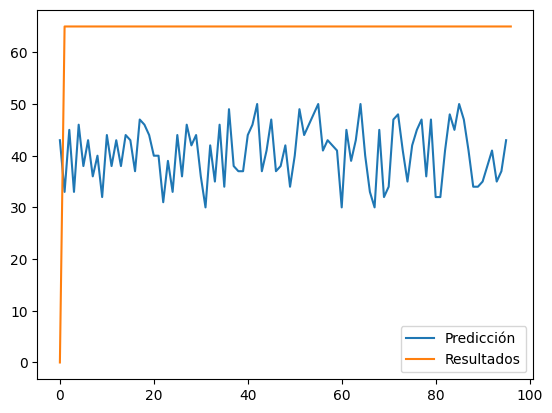

In [4]:
#Constant vars
K = 4
EPS_DECAY = 0.0000009
EPS_MIN = 0.1
BATCH_SIZE = 32
#BATCH_SIZE = 4
MAX_STEPS = 10000
STEP_UPDATE_MODEL = 5000
INPUT_SIZE = 98
EPISODES = 1000
RUN_NAME = "test_02-10"

curve_pred = [random.randint(30, 50) for i in range(96)]

env, policy_network, target_network, a_s  = define_env(RUN_NAME, ["aire1", "aire2"], INPUT_SIZE=INPUT_SIZE)

resultados = test(policy_network, env, MAX_STEPS-2, curve_pred, a_s)

saveFig(curve_pred, resultados, RUN_NAME)